### Source of data: https://www.kaggle.com/datasets/komalkhetlani/imdb-dataset?resource=download

### Aim of this notebook is to analyze IMDB dataset of movies. It's purely to find interesting patterns and insights about movie trends.

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [8]:
df1 = pd.read_csv('ImdbName.csv')
df2 = pd.read_csv('ImdbTitleAkas.csv')
df3 = pd.read_csv('ImdbTitleBasics.csv')
df4 = pd.read_csv('ImdbTitleCrew.csv')
# df5 = pd.read_csv('ImdbTitleEpisode.csv')
df6 = pd.read_csv('ImdbTitlePrincipals.csv')
df7 = pd.read_csv('ImdbTitleRatings.csv')

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_38470/3229236374.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('ImdbTitleAkas.csv')
/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_38470/3229236374.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('ImdbTitleBasics.csv')


In [26]:
print(df1.shape, df2.shape, df3.shape, df4.shape, df6.shape, df7.shape)

(1048575, 6) (1048575, 8) (1048575, 9) (1048575, 3) (1048575, 6) (1048575, 3)


In [46]:
df = pd.concat([df1, df2, df3, df4, df6, df7], axis=1)
df.shape

(1048575, 35)

In [47]:
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleId,ordering,title,region,...,writers,tconst,ordering,nconst,category,job,characters,tconst,averageRating,numVotes
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308",tt0000001,1,Карменсіта,UA,...,\N,tt0000001,1,nm1588970,self,\N,"[""Self""]",tt0000001,5.6,1694
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",tt0000001,2,Carmencita,DE,...,\N,tt0000001,2,nm0005690,director,\N,\N,tt0000002,6.0,210
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189",tt0000001,3,Carmencita - spanyol tánc,HU,...,\N,tt0000001,3,nm0374658,cinematographer,director of photography,\N,tt0000003,6.5,1441
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723",tt0000001,4,Καρμενσίτα,GR,...,\N,tt0000002,1,nm0721526,director,\N,\N,tt0000004,6.1,122
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050976,tt0050986,tt0060827",tt0000001,5,Карменсита,RU,...,\N,tt0000002,2,nm1335271,composer,\N,\N,tt0000005,6.1,2240


In [48]:
df.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles', 'titleId', 'ordering', 'title', 'region', 'language',
       'types', 'attributes', 'isOriginalTitle', 'tconst', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres', 'tconst', 'directors', 'writers', 'tconst',
       'ordering', 'nconst', 'category', 'job', 'characters', 'tconst',
       'averageRating', 'numVotes'],
      dtype='object')

In [49]:
df.drop(['tconst', 'nconst', 'ordering', 'attributes', 'titleId'], axis=1, inplace=True)

In [50]:
df.head()

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title,region,language,types,isOriginalTitle,...,endYear,runtimeMinutes,genres,directors,writers,category,job,characters,averageRating,numVotes
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308",Карменсіта,UA,\N,imdbDisplay,0,...,\N,1,"Documentary,Short",nm0005690,\N,self,\N,"[""Self""]",5.6,1694
1,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",Carmencita,DE,\N,\N,0,...,\N,5,"Animation,Short",nm0721526,\N,director,\N,\N,6.0,210
2,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189",Carmencita - spanyol tánc,HU,\N,imdbDisplay,0,...,\N,4,"Animation,Comedy,Romance",nm0721526,\N,cinematographer,director of photography,\N,6.5,1441
3,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723",Καρμενσίτα,GR,\N,imdbDisplay,0,...,\N,12,"Animation,Short",nm0721526,\N,director,\N,\N,6.1,122
4,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050976,tt0050986,tt0060827",Карменсита,RU,\N,imdbDisplay,0,...,\N,1,"Comedy,Short",nm0005690,\N,composer,\N,\N,6.1,2240


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   primaryName        1048575 non-null  object 
 1   birthYear          1048575 non-null  object 
 2   deathYear          1048575 non-null  object 
 3   primaryProfession  996826 non-null   object 
 4   knownForTitles     1048575 non-null  object 
 5   title              1048575 non-null  object 
 6   region             1048575 non-null  object 
 7   language           1048575 non-null  object 
 8   types              1048575 non-null  object 
 9   isOriginalTitle    1048575 non-null  object 
 10  titleType          1048575 non-null  object 
 11  primaryTitle       1048575 non-null  object 
 12  originalTitle      1048575 non-null  object 
 13  isAdult            1048575 non-null  int64  
 14  startYear          1048575 non-null  object 
 15  endYear            1048575 non-n

### primaryProfession column has some null values, since the rows with null values are very less, dropping those rows.

In [55]:
df[df.primaryProfession.isnull()].index

Int64Index([   2648,    3921,    4327,    5203,    7213,    7226,    7228,
               7233,    7237,    7238,
            ...
            1048517, 1048535, 1048542, 1048544, 1048545, 1048546, 1048548,
            1048551, 1048555, 1048560],
           dtype='int64', length=51749)

In [56]:
df.drop(df[df.primaryProfession.isnull()].index, axis=0, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996826 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   primaryName        996826 non-null  object 
 1   birthYear          996826 non-null  object 
 2   deathYear          996826 non-null  object 
 3   primaryProfession  996826 non-null  object 
 4   knownForTitles     996826 non-null  object 
 5   title              996826 non-null  object 
 6   region             996826 non-null  object 
 7   language           996826 non-null  object 
 8   types              996826 non-null  object 
 9   isOriginalTitle    996826 non-null  object 
 10  titleType          996826 non-null  object 
 11  primaryTitle       996826 non-null  object 
 12  originalTitle      996826 non-null  object 
 13  isAdult            996826 non-null  int64  
 14  startYear          996826 non-null  object 
 15  endYear            996826 non-null  object 
 16  r

### The most common things we look before watching a movie/series is the genre, so let's start the analysis from there.

In [59]:
df.genres

0                 Documentary,Short
1                   Animation,Short
2          Animation,Comedy,Romance
3                   Animation,Short
4                      Comedy,Short
                     ...           
1048570                  Reality-TV
1048571                   Talk-Show
1048572                 Documentary
1048573                 Drama,Short
1048574                       Music
Name: genres, Length: 996826, dtype: object

In [68]:
genres_list = ','.join(df.genres).split(',')
# genres_list

['Documentary',
 'Short',
 'Animation',
 'Short',
 'Animation',
 'Comedy',
 'Romance',
 'Animation',
 'Short',
 'Comedy',
 'Short',
 'Short',
 'Short',
 'Sport',
 'Documentary',
 'Short',
 'Romance',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Comedy',
 'Short',
 'Animation',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Short',
 'Comedy',
 'Short',
 'Documentary',
 'Short',
 'Sport',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'News',
 'Short',
 'News',
 'Short',
 'Sport',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Short',
 'Comedy',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Comedy',
 'Short',
 'Drama',
 'Short',
 'Short',
 'Documentary',
 'Short',
 'Sport',
 'Short',
 'Documentary',
 'Short',
 'Comedy',
 'Documentary',
 'Short',
 'Documentary',
 'Short',
 'Docum

In [90]:
set(genres_list)

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 '\\N'}

In [86]:
genre_count = Counter(genres_list)
words, counts = zip(*genre_count.items())

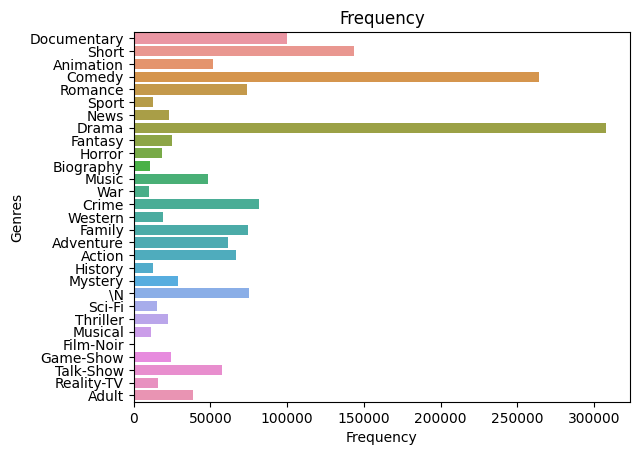

In [89]:
sns.barplot(x=list(counts), y=list(words))
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Frequency')
plt.show()

### We can observe that the dataset has the most movies with the genre Drama followed by comedy, with Biography, war, history and musicals having the least number of movies.

In [92]:
max(df.averageRating)

10.0

In [93]:
min(df.averageRating)

1.0

### The rating is out of 10

In [99]:
df.columns

Index(['primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles', 'title', 'region', 'language', 'types',
       'isOriginalTitle', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres',
       'directors', 'writers', 'category', 'job', 'characters',
       'averageRating', 'numVotes'],
      dtype='object')

In [100]:
genre_df = df.set_index(['primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles', 'title', 'region', 'language', 'types',
       'isOriginalTitle', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'directors', 'writers', 'category', 'job', 'characters',
       'averageRating', 'numVotes']).apply(lambda x: x.str.split(',').explode()).reset_index()

In [102]:
genre_df.head()

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,title,region,language,types,isOriginalTitle,...,endYear,runtimeMinutes,directors,writers,category,job,characters,averageRating,numVotes,genres
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308",Карменсіта,UA,\N,imdbDisplay,0,...,\N,1,nm0005690,\N,self,\N,"[""Self""]",5.6,1694,Documentary
1,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308",Карменсіта,UA,\N,imdbDisplay,0,...,\N,1,nm0005690,\N,self,\N,"[""Self""]",5.6,1694,Short
2,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",Carmencita,DE,\N,\N,0,...,\N,5,nm0721526,\N,director,\N,\N,6.0,210,Animation
3,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",Carmencita,DE,\N,\N,0,...,\N,5,nm0721526,\N,director,\N,\N,6.0,210,Short
4,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189",Carmencita - spanyol tánc,HU,\N,imdbDisplay,0,...,\N,4,nm0721526,\N,cinematographer,director of photography,\N,6.5,1441,Animation


In [106]:
avg_genre_ratings = genre_df[['genres', 'averageRating']].groupby('genres')['averageRating'].mean()

In [109]:
type(avg_genre_ratings)

pandas.core.series.Series

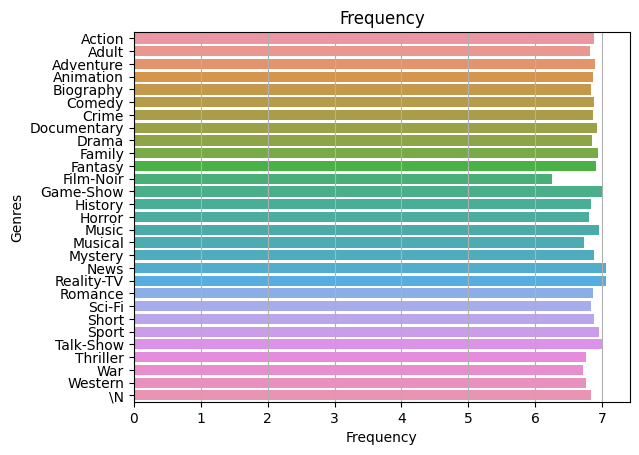

In [115]:
sns.barplot(x=avg_genre_ratings, y=avg_genre_ratings.index)
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Frequency')
plt.grid(True, axis='x')
plt.show()

### We can observe that News, Reality-TV, Game-Show and Talk-Show has the highest average rating, with the minimum rating received by Film-Noir